![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## Import Library

In [149]:
# import library
import pandas as pd
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt

## Data Loading

In [150]:
# read datasets
df_women = pd.read_csv('women_results.csv', index_col='Unnamed: 0')
df_men = pd.read_csv('men_results.csv', index_col='Unnamed: 0')

In [151]:
# display info df_women 
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4884 non-null   object
 1   home_team   4884 non-null   object
 2   away_team   4884 non-null   object
 3   home_score  4884 non-null   int64 
 4   away_score  4884 non-null   int64 
 5   tournament  4884 non-null   object
dtypes: int64(2), object(4)
memory usage: 267.1+ KB


In [152]:
# display info df_men 
df_men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


## Filtering the data

Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.

In [153]:
df_women_fifa = df_women[(df_women['tournament']=='FIFA World Cup')\
                        &(df_women['date']>='2002-01-01')]

df_men_fifa = df_men[(df_men['tournament']=='FIFA World Cup')\
                    &(df_men['date']>='2002-01-01')]

In [154]:
df_men_fifa.head()

,date,home_team,away_team,home_score,away_score,tournament
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [155]:
df_women_fifa.head()

,date,home_team,away_team,home_score,away_score,tournament
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


## Choosing the correct hypothesis test

To determine whether the average number of goals in women's soccer tournaments is equal to the average number of goals in men's tournaments, we will use a t-test if the data meets the normality assumption or a non-parametric test if this assumption is not met. Before conducting these tests, feature extraction is performed by creating the 'total_score' feature in each dataframe, which involves summing the 'home_score' and 'away_score' columns.

In [156]:
df_women_fifa['total_score'] = df_women_fifa['home_score']\
                            + df_women_fifa['away_score']

df_men_fifa['total_score'] = df_men_fifa['home_score']\
                            + df_men_fifa['away_score']

Next, a check is conducted to determine whether the 'total_score' feature in each dataframe meets the assumption of normality, in order to decide on the appropriate statistical test to be used.

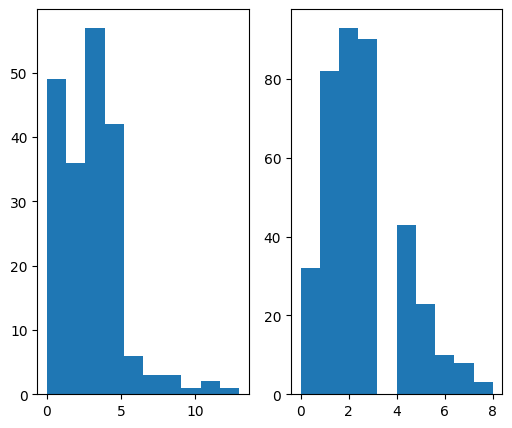

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(6,5))

ax[0].hist(x='total_score', data=df_women_fifa)
ax[1].hist(x='total_score', data=df_men_fifa)

plt.show()

In [158]:
def normality_check(data, alpha=0.05):
    stat, p_val = stats.shapiro(data)
    print(f"P-Value: {p_val}")
    if p_val > alpha:
        print("Fail to reject H0: The data follows a normal distribution")
    else:
        print("Reject H0: The data does not follow a normal distribution")

In [159]:
normality_check(df_women_fifa['total_score'])

P-Value: 3.8905201759850683e-13
Reject H0: The data does not follow a normal distribution


In [160]:
normality_check(df_men_fifa['total_score'])

P-Value: 8.894154401688226e-13
Reject H0: The data does not follow a normal distribution


Based on histogram visualization and normality test using the Shapiro-Wilk test, it is found that for each dataframe, the 'total_score' feature does not meet the assumption of normality. Therefore, a non-parametric test will be used to assess whether the average number of goals in women's soccer tournaments is equal to the average in men's tournaments.

## Performing the hypothesis test

### Hypothesis test using pingouin

In [161]:
result_pg = pg.mwu(df_women_fifa['total_score'],
                  df_men_fifa['total_score'],
                  alternative='greater')

### Hypothesis test using SciPy

In [162]:
result_scipy = stats.mannwhitneyu(df_women_fifa['total_score'],
                  df_men_fifa['total_score'],
                  alternative='greater')

## Extracting the p-value and Interpreting the Result

Assuming a significance level of **10%**, and using the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [163]:
print(result_pg)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


With a significance level of 10% and a p-value obtained using pingouin of 0.005, there is enough evidence to reject the null hypothesis ($H_0$). This indicates that the average number of goals in women's soccer tournaments is higher than the average number of goals in men's soccer tournaments. Furthermore, an extraction of the p-value will be performed using the scipy library as follows.

In [164]:
stat, p_val = result_scipy
alpha = 0.10

result_dict = {'p_val':p_val}

if p_val > alpha:
    result_dict['result'] = 'fail to reject'
    print(f"P Value: {p_val}")
    print("Fail to reject H0: The mean number of goals scored in women's international soccer matches is the same as men's.")
    
else:
    result_dict['result'] = 'reject'
    print(f"P Value: {p_val}")
    print("Reject H0: The mean number of goals scored in women's international soccer matches is greater than men's.")

P Value: 0.005106609825443641
Reject H0: The mean number of goals scored in women's international soccer matches is greater than men's.


## Conclusion

The questions to be determined are:

> Are more goals scored in women's international soccer matches than men's?

**Answer:**

Yes, based on the statistical test using the Mann-Whitney U Test with both the pingouin and scipy libraries, and with a significance level of 10%, we obtained a p-value that is less than 10%. Therefore, there is enough evidence to reject the null hypothesis (H0). In other words, there are more goals scored in women's international soccer matches than in men's matches.